# Stcok ML analysis

In this text we try to investigate how Machine Learning can do for price prediciton in stock market or look at a very general idea that what kind of data or pattern we can observe in these type of datas.

## Loading data

We first load the last prices from *IEXTrading* data basis:

In [5]:
import urllib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NasDaq = ['ATVI','ADBE' , 'AMD', 'ALGN', 'ALXN' , 'AMZN','AMGN','AAL','ADI','AAPL','AMAT','ASML','ADSK','ADP','AVGO'
          ,'BIDU','BIIB' , 'BMRN' , 'CDNS' , 'CELG' , 'CERN' , 'CHKP','CHTR','CTRP' ,'CTAS','CSCO','CTXS','CMCSA'
          ,'COST','CSX','CTSH','DLTR','EA','EBAY','EXPE','FAST','FB','FISV','FOX','FOXA','GILD','GOOG','GOOGL','HAS'
          ,'HSIC','ILMN','INCY','INTC','INTU','ISRG','IDXX','JBHT','JD','KLAC','KHC','LRCX','LBTYA','LBTYK','LULU'
          ,'MELI','MAR','MCHP','MDLZ','MNST','MSFT','MU','MXIM','MYL','NTAP','NFLX','NTES','NVDA','NXPI','ORLY','PAYX'
          ,'PCAR','BKNG','PYPL','PEP','QCOM','REGN','ROST','SIRI','SWKS','SBUX','SYMC','SNPS','TTWO','TSLA'
          ,'TXN','TMUS','ULTA','UAL','VRSN','VRSK','VRTX','WBA','WDC','WDAY','WLTW','WYNN','XEL','XLNX']

def getPrice (df):
    n = len(df)
    price = np.zeros(n)
    for i in range (n):
        price[i] = df.iloc[i]['close']
    return price

price = {}
    
for company in NasDaq:
    url = "https://api.iextrading.com/1.0/stock/" + company + "/batch?types=chart&range=1y"
    response = urllib.request.urlopen(url)
    df = pd.DataFrame(data = json.loads(response.read())).chart
    price[company] = getPrice(df)

df = pd.DataFrame(data = price)
df.to_csv('stock_data.csv', sep=',')

We can plot the evoloution of all prices :

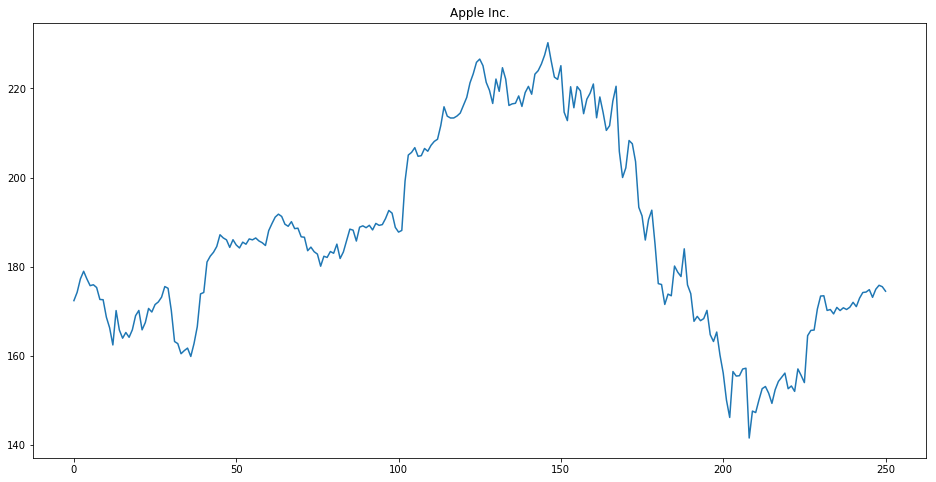

In [11]:
def plotPrice (price , name="stock price"):
    plt.figure(figsize=(16,8))
    plt.title(name)
    plt.plot (range(len(price)) , price)
    plt.show()

plotPrice (df.AAPL , name ="Apple Inc." )

### Simple Regression 
We look at different analysis we can apply for these type of datas. For example as a first quesiton, can we write a price of given stock as a linear combination of other stock prices. For answering that, we apply a simple regression model. Here we go: